# Quantum classification of Iris dataset with 2 labels

In [29]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

from quantum_classification import *

## Traing with 2 features

In [37]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [39]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

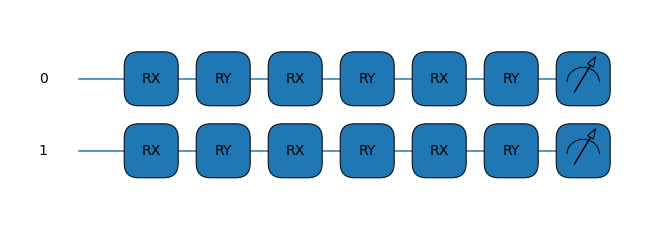

In [40]:
iris.draw_circuit()

In [41]:
iris.optimize()

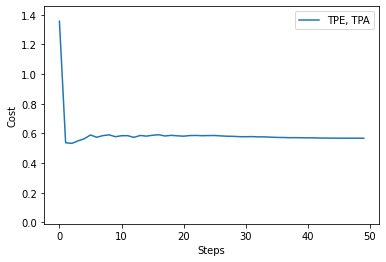

In [42]:
iris.plot_cost()

In [43]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  0.35
optimized cost;  0.5671622754619572


## Train with 4 features

In [11]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.55 0.95 0.15 0.15] -1.0
[0.25 0.5  0.2  0.  ] -1.0
[0.6 0.2 1.4 0.5] 1.0


In [13]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

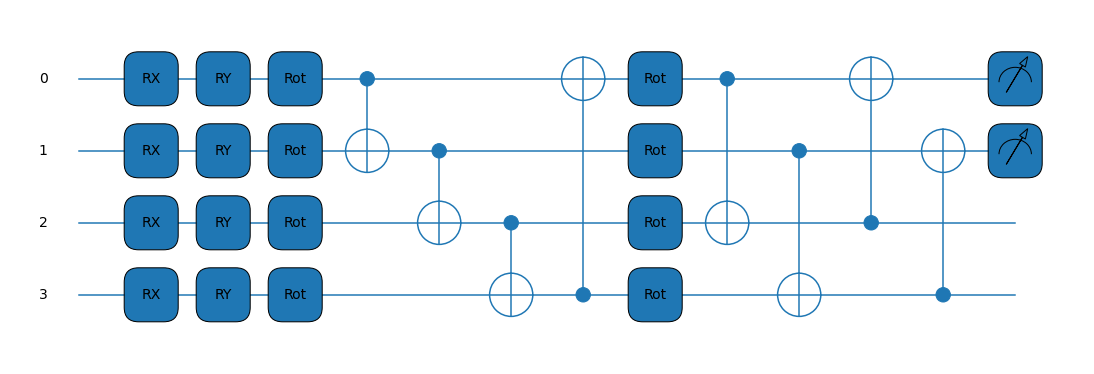

In [14]:
iris.draw_circuit()

In [15]:
iris.optimize()

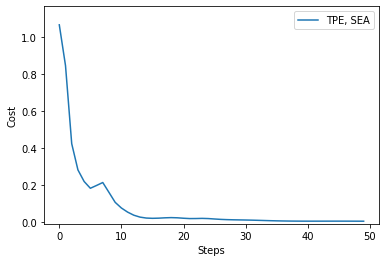

In [16]:
iris.plot_cost()

In [17]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.004038181982925655


## Circuit structure and accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from structure_effect_on_trainability import *

data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [ ]:
nqubits = X.shape[1]; nlayers_list = [2]; cost_type = 'LOG'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 50

optimized_cost_acc_iris, cost_all_iris = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, nlayers_list, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


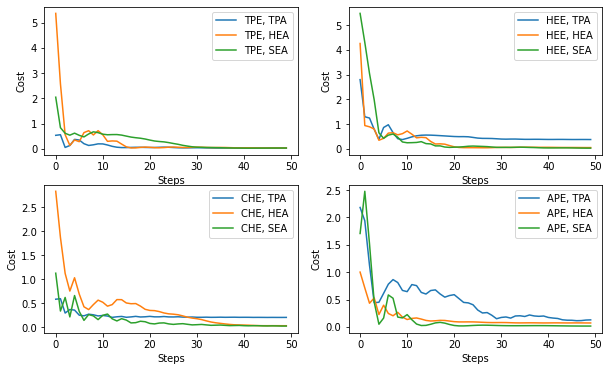

In [ ]:
plot_cost(cost_all_iris)

In [ ]:
sort_cost_acc(cost_type, optimized_cost_acc_iris)

LOG
embedding_type: APE, ansatz_type: SEA: cost 0.0146683403088801
embedding_type: CHE, ansatz_type: SEA: cost 0.021806839387320823
embedding_type: CHE, ansatz_type: HEA: cost 0.028513698218436613
embedding_type: HEE, ansatz_type: SEA: cost 0.029447257914742224
embedding_type: TPE, ansatz_type: TPA: cost 0.029810986123318346
embedding_type: TPE, ansatz_type: SEA: cost 0.03144655565180411
embedding_type: TPE, ansatz_type: HEA: cost 0.0335565256992119
embedding_type: HEE, ansatz_type: HEA: cost 0.052836581291519844
embedding_type: APE, ansatz_type: HEA: cost 0.07111917541456936
embedding_type: APE, ansatz_type: TPA: cost 0.1277697891191641
embedding_type: CHE, ansatz_type: TPA: cost 0.2021591391389686
embedding_type: HEE, ansatz_type: TPA: cost 0.3773560191077638
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: SEA: accuracy 1.0
embedding_type: HEE, ansatz_type: HEA: accuracy 1.0
embeddin

## Another dataset (2 features and 4 labels)

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

from quantum_classification import *

In [2]:
N = 20
X = np.random.uniform(-1, 1, (N,2))
Y = np.zeros(N).astype(int)

for i,x in enumerate(X):
    if x[0] > 0:
        if x[1] > 0:
            Y[i] = -1
        else:
            Y[i] = -4
    else:
        if x[1] > 0:
            Y[i] = 1
        else:
            Y[i] = 2

print(X[:5])
print(Y[:5])

[[-0.00478305  0.90235661]
 [-0.12437602  0.46111276]
 [ 0.62478431  0.6034506 ]
 [ 0.21048681 -0.53719428]
 [-0.84588739  0.37939584]]
[ 1  1 -1 -4  1]


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# settings
nqubits = 4; nlayers = 3; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

test = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

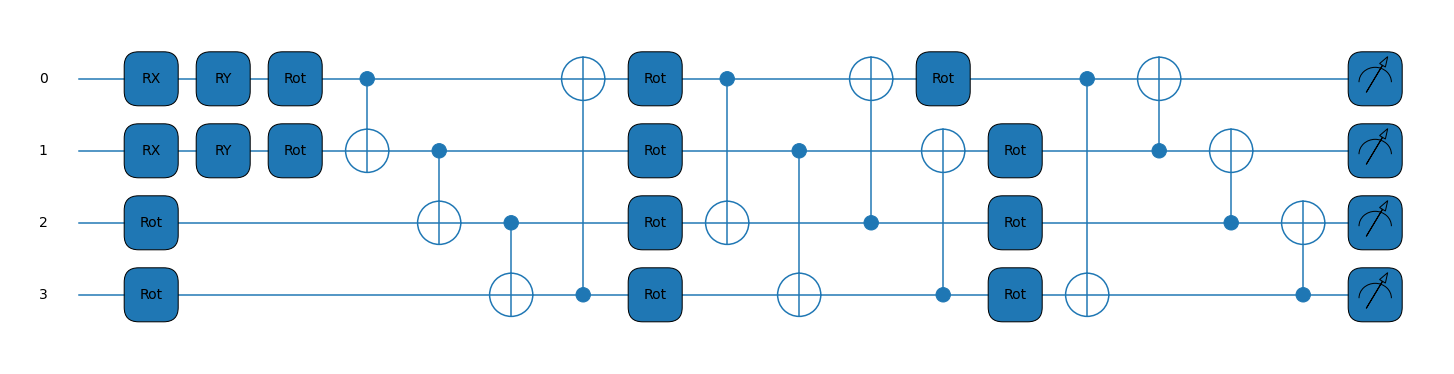

In [4]:
test.draw_circuit()

In [5]:
test.optimize()

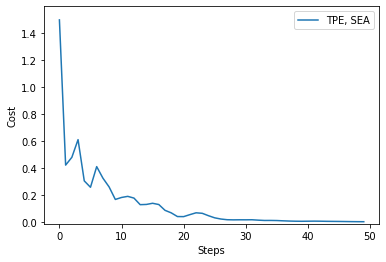

In [6]:
test.plot_cost()

In [7]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  0.005411882827973295
